## Gig Economy Project

By: Janet Taylor & Evan Kessler

Workers in the gig economy (i.e., Uber, GrubHub, TaskRabbit, etc.) depend on the reviews they get to continue working on the platform. Workers on those platforms are often affected by receiving negative reviews that describe elements that were not under their control. The project explores how the analysis of online reviews can detect when unfair reviews are left to workers and identify the type of unfair review that was left.

In [1]:
import pandas as pd

Data loading cell. Converted the review bodies to all lowercase for uniformity. If a state is not provided (the Lyft data contains no states, while Uber has null for other countries) it will show as NaN below. The "Invited" column refers to if the company asked the user to give the review vs. if the user gave the review of their own volition.

In [2]:
df = pd.read_csv("noise/Uber Reviews _ Read Customer Service Reviews of Trustpilot.csv", encoding='utf_8_sig', usecols =[0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13], names=['# Reviews By User', 'User URL', 'State', 'Username', 'Country', 'Date Review Given', 'Invited', 'Review URL', 'Review Title', 'Review Body', 'Date of Experience', 'Rating'], skiprows=1)
df['Company'] = 'Uber'
lyft_df = pd.read_csv("noise/Lyft Reviews _ Read Customer Service Reviews of Trustpilot.csv", encoding='utf_8_sig', skiprows=1, usecols=[0, 1, 3, 4, 5, 6, 7, 8, 9, 12], names=['# Reviews By User', 'User URL', 'Username', 'Country', 'Date Review Given', 'Review URL', 'Review Title', 'Review Body', 'Date of Experience', 'Rating'])
lyft_df['Company'] = 'Lyft'
df = pd.concat([df, lyft_df])
df['Rating'] = df['Rating'].apply(lambda x: x[6])
df['Review Body'] = df['Review Body'].apply(lambda x: str(x).lower())
df['# Reviews By User'] = df['# Reviews By User'].apply(lambda x: x.split(' ')[0])
df['Date of Experience'] = df['Date of Experience'].apply(lambda x: x.replace('Date of experience: ', '').strip())
df = df[df['Review Body'].notnull()]
df['Date of Experience'] = pd.to_datetime(df['Date of Experience'], infer_datetime_format=True) 
df.to_csv('Trustpilot Cleaned.csv', index=False)
df['Invited'] = df['Invited'].apply(lambda x: x == 'Invited')
df = df.astype({'Rating': 'int32'})
df

,# Reviews By User,User URL,State,Username,Country,Date Review Given,Invited,Review URL,Review Title,Review Body,Date of Experience,Rating,Company
0,17,https://www.trustpilot.com/users/5c22477be4f44...,NaN,Paul Pitman,GB,A day ago,False,https://www.trustpilot.com/reviews/63f130d49b6...,Uber from Norwood so sucked,uber from norwood junction to friend’s party ...,2023-02-17,1,Uber
1,3,https://www.trustpilot.com/users/602209d7fe424...,KA,KATHLEEN,US,5 hours ago,True,https://www.trustpilot.com/reviews/63f228859b6...,Ellie was exceptional,"all your driver's we very good, knowledgeable ...",2023-02-16,5,Uber
2,1,https://www.trustpilot.com/users/63f17dca2c3e9...,TL,Thomas Littleton,US,17 hours ago,True,https://www.trustpilot.com/reviews/63f17dcb9b6...,Disappointed,driver canceled the ride because he couldn’t f...,2023-02-16,3,Uber
3,1,https://www.trustpilot.com/users/63f1a4db8f663...,NaN,kumar kanakapura,IN,14 hours ago,False,https://www.trustpilot.com/reviews/63f1a4ef6f3...,Nasty behavior of Uber auto driver,uber driver complained he does not know the ro...,2023-02-17,1,Uber
4,1,https://www.trustpilot.com/users/63f19b0b168cf...,MW,Maryse W.,US,15 hours ago,True,https://www.trustpilot.com/reviews/63f19b0c6f3...,"Safe drivers, with a bit of tour guide",love that apicture and name of driver comes up...,2023-02-16,4,Uber
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6838,1,https://www.trustpilot.com/users/52e6a40f00006...,NaN,John,US,27-Jan-14,False,https://www.trustpilot.com/reviews/52e6a40f000...,Very supportive and fun to drive for,lyft is a lot of fun make money meeting new pe...,2014-01-27,5,Lyft
6839,1,https://www.trustpilot.com/users/52e6a3eb00006...,NaN,Addis,US,27-Jan-14,False,https://www.trustpilot.com/reviews/52e6a3eb000...,people first,as a driver great way to make some extra money...,2014-01-27,5,Lyft
6840,1,https://www.trustpilot.com/users/52e6a35d00006...,NaN,Brian,US,27-Jan-14,False,https://www.trustpilot.com/reviews/52e6a35d000...,Need better regulations,too many drivers on at a time. not making the ...,2014-01-27,4,Lyft
6841,1,https://www.trustpilot.com/users/52e6a34300006...,NaN,Jack,US,27-Jan-14,False,https://www.trustpilot.com/reviews/52e6a343000...,Lyft is an amazing service that I highly recom...,i love taking lyfts around la. the service is ...,2014-01-27,5,Lyft


In [3]:
df_cleaned = df[df['Review Body'].str.contains('driver') & ~df['Review Body'].str.contains('(?:am.*driver)|(?:as a driver)')]
df_cleaned.head()
df_cleaned["Unfair"] = None;
print(df_cleaned.shape)

uber_dirty = df[df.Company == 'Uber']
lyft_dirty = df[df.Company == 'Lyft']

uber = df_cleaned[df_cleaned.Company == 'Uber']
lyft = df_cleaned[df_cleaned.Company == 'Lyft']

uber.to_csv("uber_cleaned.csv", index=False)
lyft.to_csv("lyft_cleaned.csv", index=False)

C:\Users\jdonu\AppData\Local\Temp\ipykernel_22728\4014332144.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["Unfair"] = None;


(6475, 14)


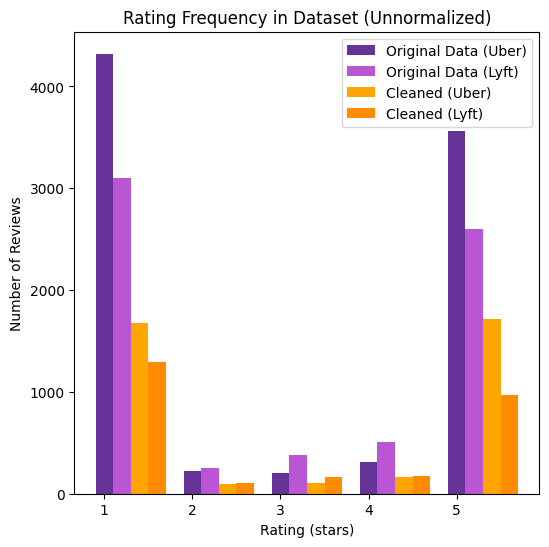

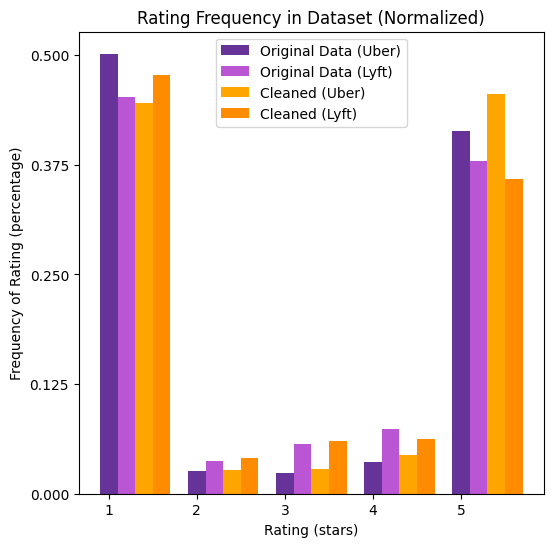

In [4]:
from matplotlib import pyplot as plt
import numpy as np

X_axis = np.arange(1,6)
width = 0.2


plt.figure(figsize=(6, 6))
plt.bar(X_axis, uber_dirty['Rating'].value_counts().sort_index(), width=width, color='rebeccapurple', label='Original Data (Uber)')
plt.bar(X_axis + width, lyft_dirty['Rating'].value_counts().sort_index(), width=width, color='mediumorchid', label='Original Data (Lyft)')
plt.bar(X_axis + 2 * width, uber['Rating'].value_counts().sort_index(), width=width, color='orange', label='Cleaned (Uber)')
plt.bar(X_axis + 3 * width, lyft['Rating'].value_counts().sort_index(), width=width, color='darkorange', label='Cleaned (Lyft)')
plt.xticks(X_axis, df['Rating'].unique().sort())
plt.title('Rating Frequency in Dataset (Unnormalized)')
plt.xlabel('Rating (stars)')
plt.ylabel('Number of Reviews')
plt.legend()
plt.show()

plt.figure(figsize=(6, 6))
plt.bar(X_axis, uber_dirty['Rating'].value_counts().sort_index() / uber_dirty.shape[0], width=width, color='rebeccapurple', label='Original Data (Uber)')
plt.bar(X_axis + width, lyft_dirty['Rating'].value_counts().sort_index() / lyft_dirty.shape[0], width=width, color='mediumorchid', label='Original Data (Lyft)')
plt.bar(X_axis + 2 * width, uber['Rating'].value_counts().sort_index() / uber.shape[0], width=width, color='orange', label='Cleaned (Uber)')
plt.bar(X_axis + 3 * width, lyft['Rating'].value_counts().sort_index() / lyft.shape[0], width=width, color='darkorange', label='Cleaned (Lyft)')
plt.xticks(X_axis, df['Rating'].unique().sort())
plt.yticks(np.linspace(0, 0.5, 5))
plt.title('Rating Frequency in Dataset (Normalized)')
plt.xlabel('Rating (stars)')
plt.ylabel('Frequency of Rating (percentage)')
plt.legend()
plt.show()

In [5]:
def get_rating_breakdown(clean, dirty):
    breakdown = pd.DataFrame(clean.Rating.value_counts().sort_index())
    breakdown.columns = ["Cleaned Ratings"]
    breakdown["Dirty Ratings"] = dirty.Rating.value_counts().sort_index()
    breakdown["% Ratings Kept Within Category"] = breakdown["Cleaned Ratings"] / breakdown["Dirty Ratings"]
    print("Average Ratings Kept:" + str(breakdown["% Ratings Kept Within Category"].mean()))
    breakdown["% Ratings Kept For Company"] = breakdown["Cleaned Ratings"] / np.sum(breakdown["Dirty Ratings"])
    breakdown["% Ratings Kept For Total Dataset"] = breakdown["Cleaned Ratings"] / np.sum(df.Rating.value_counts().sort_index())
    return breakdown


print("## Uber Ratings")
get_rating_breakdown(uber, uber_dirty)

## Uber Ratings


,Cleaned Ratings,Dirty Ratings,% Ratings Kept Within Category,% Ratings Kept For Company,% Ratings Kept For Total Dataset
1,1680,4321,0.388799,0.195077,0.108703
2,100,220,0.454545,0.011612,0.006470
3,108,199,0.542714,0.012541,0.006988
4,165,314,0.525478,0.019159,0.010676
5,1718,3558,0.482856,0.199489,0.111161


In [6]:
print("## Lyft Ratings")
get_rating_breakdown(lyft, lyft_dirty)

## Lyft Ratings


,Cleaned Ratings,Dirty Ratings,% Ratings Kept Within Category,% Ratings Kept For Company,% Ratings Kept For Total Dataset
1,1291,3099,0.416586,0.188660,0.083533
2,110,256,0.429688,0.016075,0.007117
3,163,385,0.423377,0.023820,0.010547
4,170,508,0.334646,0.024843,0.011000
5,970,2595,0.373796,0.141751,0.062763


## A 'prompted' review is one made because the app requested the rider to leave a review. Not present for the Lyft dataset.


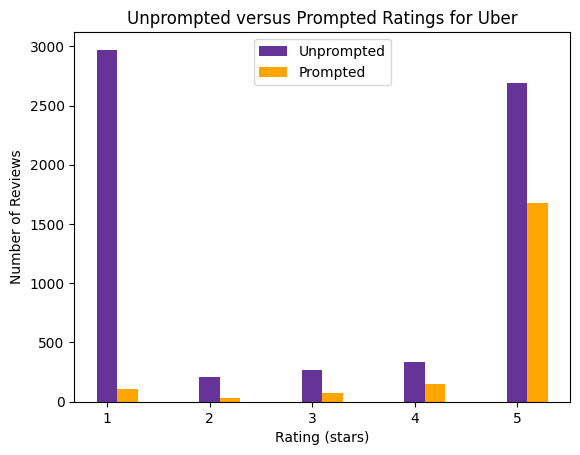

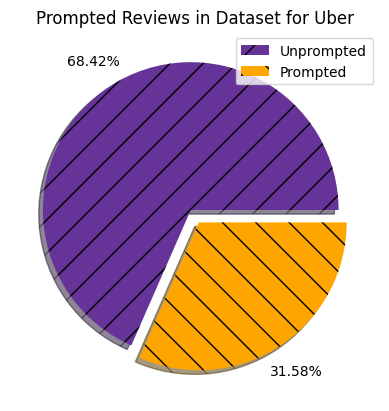

In [7]:
print("## A 'prompted' review is one made because the app requested the rider to leave a review. Not present for the Lyft dataset.")

prompted = df_cleaned[df_cleaned.Invited]
plt.bar(X_axis, df_cleaned['Rating'].value_counts().sort_index(), width=width, color='rebeccapurple', label='Unprompted')
plt.bar(X_axis + width, prompted['Rating'].value_counts().sort_index(), width=width, color='orange', label='Prompted')
plt.xticks(X_axis, X_axis)
plt.title('Unprompted versus Prompted Ratings for Uber')
plt.xlabel('Rating (stars)')
plt.ylabel('Number of Reviews')
plt.legend()
plt.show()

num_prompted = prompted.shape[0]
plt.title("Prompted Reviews in Dataset for Uber")
plt.pie([df_cleaned.shape[0] - num_prompted, num_prompted], labels=["Unprompted", "Prompted"], hatch=['/', '\\'],
       autopct='%.2f%%', explode=(0.05, 0.05), shadow=True, labeldistance=None, pctdistance=1.2, rotatelabels=True,
       colors=['rebeccapurple', 'orange'])
plt.legend()
plt.show()

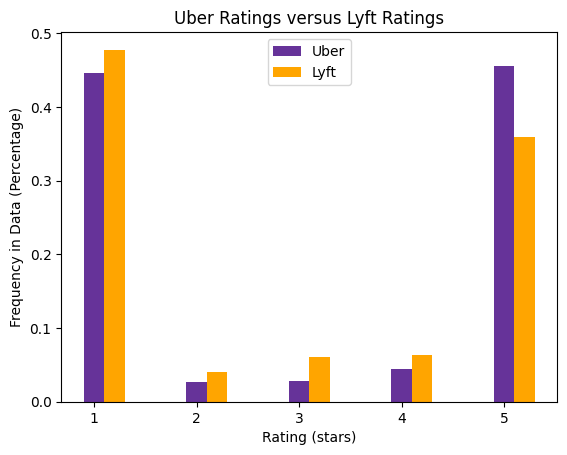

In [8]:
Y_axis = np.linspace(0, 1, 5)
u_total_counts = uber['Rating'].value_counts().sort_index() / uber.shape[0]
l_total_counts = lyft['Rating'].value_counts().sort_index() / lyft.shape[0]

plt.bar(X_axis, u_total_counts, width=width, color='rebeccapurple', label='Uber')
plt.bar(X_axis + width, l_total_counts, width=width, color='orange', label='Lyft')
plt.xticks(X_axis, X_axis)
plt.title('Uber Ratings versus Lyft Ratings')
plt.xlabel('Rating (stars)')
plt.ylabel('Frequency in Data (Percentage)')
plt.legend()
plt.show()

In [9]:
def get_num_ratings(dataset, min_star, max_star):
    stars = dataset[(dataset.Rating >= min_star) & (dataset.Rating <= max_star)]
    return stars.shape[0]

print("## Rating Breakdown (Cleaned Data)")
print("For the sake of these numbers, <= 2 stars is negative, 3 stars is neutral, and <= 5 stars is positive.")
rating_happiness = pd.DataFrame([["Uber", get_num_ratings(uber, 1, 2), get_num_ratings(uber, 3, 3), get_num_ratings(uber, 4, 5)],
                                    ["Lyft", get_num_ratings(lyft, 1, 2), get_num_ratings(lyft, 3, 3), get_num_ratings(lyft, 4, 5)]], columns=['Company', 'Negative', 'Neutral', 'Positive'])

rating_happiness

## Rating Breakdown (Cleaned Data)
For the sake of these numbers, <= 2 stars is negative, 3 stars is neutral, and <= 5 stars is positive.


,Company,Negative,Neutral,Positive
0,Uber,1780,108,1883
1,Lyft,1401,163,1140
